In [1]:
import os
import numpy as np
from custom_module import max_width, categorical_crack
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl

In [2]:
true_path = '/home/jovyan/work/hangman/dataset/crack_segmentation_dataset/minimal/test/masks'
true_mask = os.listdir(true_path)
true_mask = [mask for mask in true_mask if mask.endswith('.jpg')]
true_mask.sort()
true_category = []
for mask in true_mask:
    true_category.append(categorical_crack(max_width(os.path.join(true_path, mask))))

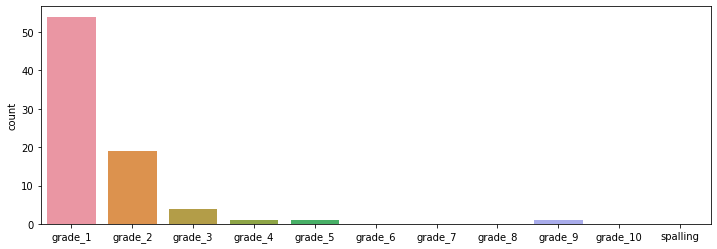

In [5]:
plt.figure(figsize=(12,4))
sns.countplot(true_category, order=['grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5',
                                    'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'spalling'])
plt.show()

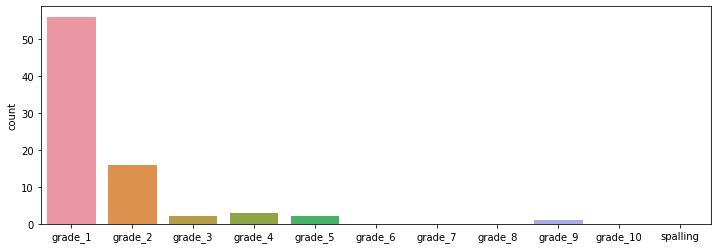

model exp12 accuracy: 0.860000


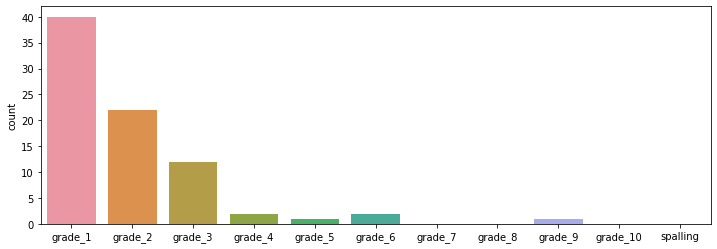

model exp13 accuracy: 0.690000


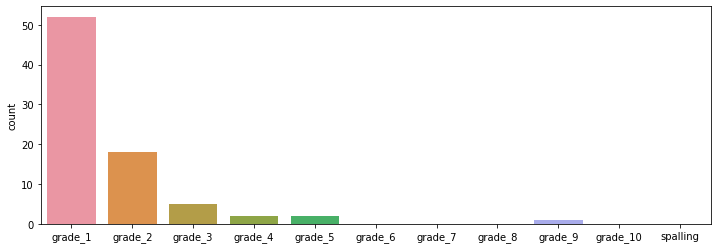

model exp14 accuracy: 0.820000


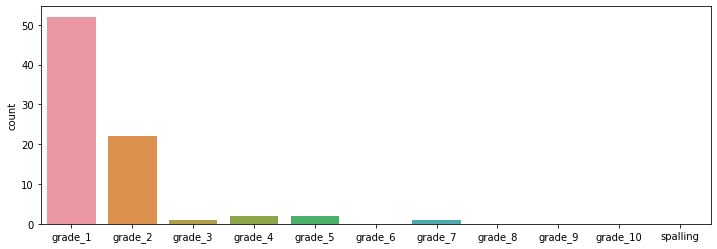

model exp15 accuracy: 0.840000


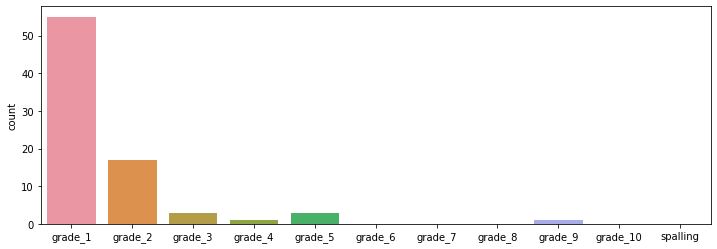

model exp16 accuracy: 0.880000


In [7]:
models = ['exp12', 'exp13', 'exp14', 'exp15', 'exp16']

for model in models:
    pred_path = os.path.join('test_results', model, 'pred')
    pred_mask = os.listdir(pred_path)
    pred_mask = [mask for mask in pred_mask if mask.endswith('.jpg')]
    pred_mask.sort()
    total_num = len(pred_mask)
    pred_category = []
    for mask in pred_mask:
        pred_category.append(categorical_crack(max_width(os.path.join(pred_path, mask))))
    plt.figure(figsize=(12,4))
    sns.countplot(pred_category, order=['grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5',
                                        'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'spalling'])
    plt.show()
    correct_num = np.sum(np.array(true_category) == np.array(pred_category))
    acc = round(correct_num/total_num,2)
    print('model %s accuracy: %f'%(str(model), acc))